In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/salaries-2023.csv")


# Explore data


# visualize first five rows of the data 
df.head()


print(df.shape)

# print(df.describe())

# check for null values in the dataset
nullValues = df.isnull().sum()

print(nullValues)

# drop null values
df = df.dropna()

# verify null values have been dropped
nullValues = df.isnull().sum()

print(nullValues)

print(df.shape)

print(df.info())

df.describe()



(762, 5)
language               1
city                   1
level                  1
years_of_experience    0
salary                 0
dtype: int64
language               0
city                   0
level                  0
years_of_experience    0
salary                 0
dtype: int64
(760, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 2 to 761
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   language             760 non-null    object 
 1   city                 760 non-null    object 
 2   level                760 non-null    float64
 3   years_of_experience  760 non-null    int64  
 4   salary               760 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 35.6+ KB
None


,level,years_of_experience,salary
count,760.000000,760.000000,760.000000
mean,2.203947,5.234211,2839.484211
std,0.718097,2.948462,2071.858144
min,1.000000,1.000000,670.000000
25%,2.000000,3.000000,1800.000000
50%,2.000000,5.000000,2500.000000
75%,3.000000,8.000000,3300.000000
max,3.000000,10.000000,30000.000000


In [63]:
print(df.language.value_counts())

php           217
js            181
.net          105
java           93
python         37
go             26
c++            24
node           19
kotlin         15
ruby           14
swift           6
rust            4
flutter         4
sql             2
sap             2
scala           2
pascal          1
vue             1
salesforce      1
unity           1
blockchain      1
uipath          1
openedge        1
devops          1
progress        1
Name: language, dtype: int64


In [64]:
# dropping every data except ones above 90. the rest are below 40 and we cant really make any significant conclusion because they are insufficient

allowed_languages = ['php','js','.net','java']

# select only the allowed languages
df = df[df['language'].isin(allowed_languages)]

print(df.shape)

(596, 5)


In [65]:
# filter cities

print(df.city.value_counts())

Vilnius                     337
Kaunas                      155
Klaipėda                     11
JAV                           9
Vilniuje                      9
UK                            8
Šiauliai                      7
Kaune                         7
Vokietija                     6
vilnius                       6
Klaipeda                      4
Danija                        4
VILNIUS                       3
Mažeikiai                     2
Olandija                      2
Norvegija                     2
kaunas                        2
Panevėžys                     2
Šveicarija                    2
Alytus                        1
Vilniua                       1
Rumsiskes                     1
Panevezys                     1
KAUNAS                        1
Baltarusija                   1
Jonava                        1
Klaipėdoje                    1
Birštonas                     1
Prancūzija                    1
Tauragė                       1
Vilniuj                       1
Pietų Af

In [66]:
# from the above data we could argue that the majority if programmers are from Vilnius and Kaunas
# also from the above we realized that some of the city names were misspelt so we have to fix that

vilnius_names = ['Vilniuj', 'Vilniua', 'VILNIUJE', 'VILNIUS', 'vilnius', 'Vilniuje']
condition = df['city'].isin(vilnius_names)
df.loc[condition, 'city'] = 'Vilnius'
 
kaunas_names = ['KAUNAS', 'kaunas', 'Kaune']
condition = df['city'].isin(kaunas_names)
df.loc[condition, 'city'] = 'Kaunas'
 
print(df.city.value_counts())

Vilnius                     358
Kaunas                      165
Klaipėda                     11
JAV                           9
UK                            8
Šiauliai                      7
Vokietija                     6
Klaipeda                      4
Danija                        4
Mažeikiai                     2
Šveicarija                    2
Panevėžys                     2
Norvegija                     2
Olandija                      2
Pietų Afrikos Respublika      1
Panevezys                     1
Rumsiskes                     1
Siauliai                      1
Birštonas                     1
Jonava                        1
Baltarusija                   1
Marijampole                   1
Prancūzija                    1
Alytus                        1
Klaipėdoje                    1
Skandinavija                  1
Tauragė                       1
Suomija                       1
Name: city, dtype: int64


In [67]:
# dropping other cities as they are not represented enough to have statistical significance

allowed_cities = ['Vilnius','Kaunas']
df = df[df['city'].isin(allowed_cities)]

print(df.shape)

(523, 5)


In [68]:
# filter outliers with huge salaries
df_sorted = df.sort_values(by='salary', ascending=False)

df_sorted.head(20)


,language,city,level,years_of_experience,salary
150,js,Vilnius,3.0,6,14000
704,js,Vilnius,3.0,7,8400
609,.net,Vilnius,3.0,10,8000
143,php,Vilnius,3.0,10,7500
735,php,Vilnius,3.0,9,7000
29,js,Vilnius,3.0,9,6000
306,php,Kaunas,3.0,9,5500
339,php,Vilnius,3.0,10,5500
738,js,Vilnius,3.0,10,5300
462,js,Vilnius,3.0,10,5261


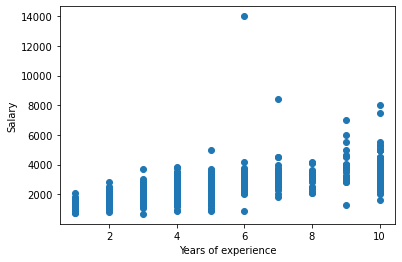

In [69]:
# plot the dataset to check for outliers
x = df.iloc[:,-2:-1]
y = df.iloc[:,-1].values

plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.scatter(x,y)
plt.show()

In [70]:
# filter salaries up to 6000

df = df[df['salary'] <= 6000]
print(df.shape)

(518, 5)


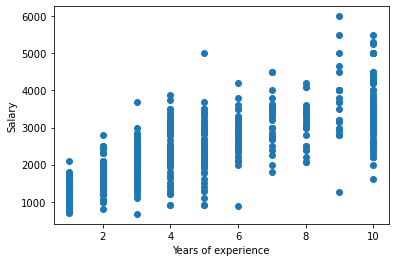

In [71]:
# visualize data
x = df.iloc[:, -2:-1]
y = df.iloc[:,-1].values
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.scatter(x, y)
plt.show()

In [72]:
# encode strings into number

one_hot = pd.get_dummies(df['language'],prefix='lang')

df = df.join(one_hot)

df = df.drop('language', axis=1)

one_hot = pd.get_dummies(df['city'], prefix='city')

df = df.join(one_hot)

df = df.drop('city',axis=1)

df.head(10)

,level,years_of_experience,salary,lang_.net,lang_java,lang_js,lang_php,city_Kaunas,city_Vilnius
4,3.0,10,2800,0,0,0,1,0,1
5,3.0,10,3400,0,0,0,1,0,1
6,3.0,10,2500,0,1,0,0,0,1
7,2.0,4,2100,0,0,0,1,1,0
9,1.0,1,1181,1,0,0,0,0,1
10,3.0,8,3500,0,0,0,1,0,1
11,2.0,2,1800,1,0,0,0,1,0
12,1.0,5,1800,0,0,0,1,1,0
15,2.0,5,2700,0,0,0,1,0,1
17,2.0,10,2000,0,0,1,0,1,0


<function matplotlib.pyplot.show(close=None, block=None)>

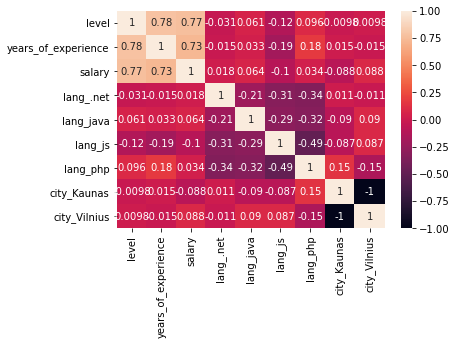

In [61]:
# one question to raise:is the salary bigger or smaller based on the programming language, city, level, years of experience ie finding out the correclation between
# the salaries and the other columns

# we can use correlation heatmap for this

sns.heatmap(df.corr(), annot=True)
plt.show

In [73]:
# the correlation of 0.77 or 0.73 is pretty strong. It means that salary depends quite strongly on the years of experience and the level
# based on the correlation map, it shows that salary does not depend strongly on the rest of the columns so we can drop them

x = df.iloc[:,0:2].values # we take only years and level
y = df.iloc[:,2].values # we take the salary column

print(x[0:5])

[[ 3. 10.]
 [ 3. 10.]
 [ 3. 10.]
 [ 2.  4.]
 [ 1.  1.]]


In [74]:
print(y[0:5])

[2800 3400 2500 2100 1181]


In [77]:
# building the model

#split the data into train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print(x_train.shape)





(414, 2)


In [78]:
# import model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

# predict y_test values
y_pred = model.predict(x_test)
print(y_pred)

[1199.71172545 3090.85570562 1199.71172545 2446.32022189 1199.71172545
 3191.20120774 2245.62921766 1199.71172545 2647.01122613 2245.62921766
 2044.93821342 1300.05722757 3592.58321622 3191.20120774 2145.28371554
 1199.71172545 2647.01122613 3291.54670986 3191.20120774 2044.93821342
 3391.89221198 2044.93821342 3191.20120774 3090.85570562 1199.71172545
 3090.85570562 3592.58321622 1199.71172545 2245.62921766 3592.58321622
 2145.28371554 2145.28371554 3391.89221198 1199.71172545 3592.58321622
 2145.28371554 2145.28371554 2245.62921766 3592.58321622 1400.40272969
 2145.28371554 2145.28371554 3391.89221198 3592.58321622 1944.5927113
 2847.70223037 1300.05722757 1199.71172545 1199.71172545 3492.2377141
 1300.05722757 1944.5927113  1300.05722757 2446.32022189 2245.62921766
 3592.58321622 1300.05722757 2446.32022189 2145.28371554 1300.05722757
 2145.28371554 3592.58321622 3592.58321622 1199.71172545 1500.74823181
 1944.5927113  2245.62921766 2446.32022189 1300.05722757 2446.32022189
 3391.89

In [79]:
# check model accuracy
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)

print(f"R2 Score: {r2} ({r2:.2%})")

R2 Score: 0.6311227637903979 (63.11%)


In [ ]:
# the accuracy of the model is 63%.. this is not so great